In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [8]:
# Pandas:
# Reading and Manipulating Data: Pandas is essential for loading your dataset 
# (typically in formats like CSV, Excel, etc.) and for performing data manipulation and cleaning. 
# It provides DataFrame objects, which are powerful for handling and analyzing data in a tabular form.
# Example: pd.read_csv('data.csv') to read a CSV file into a DataFrame.


# NumPy:
# Numerical Operations: NumPy is used for efficient numerical computations. 
# It provides support for arrays, which are more efficient than Python lists for numerical operations. 
# It also includes functions for mathematical operations on these arrays.
# Example: np.array([1, 2, 3]) to create an array.


# Matplotlib:
# Data Visualization: Matplotlib is used for creating static, interactive, and animated visualizations in Python. 
# It is particularly useful for plotting the data and the regression line to visually analyze the relationship
# between variables.
# Example: plt.plot(x, y) to create a line plot.


# Scikit-learn (sklearn):
# Machine Learning: Scikit-learn is a library for machine learning that includes simple and efficient tools 
# for data mining and data analysis. For linear regression, it provides the linear_model module, which you can 
# use to fit a linear model to your data.

In [9]:
df = pd.read_csv('canada_per_capita_income.csv')
df
# Loading the dataset into a DataFrame using Pandas allows you to easily manipulate and inspect the data.

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


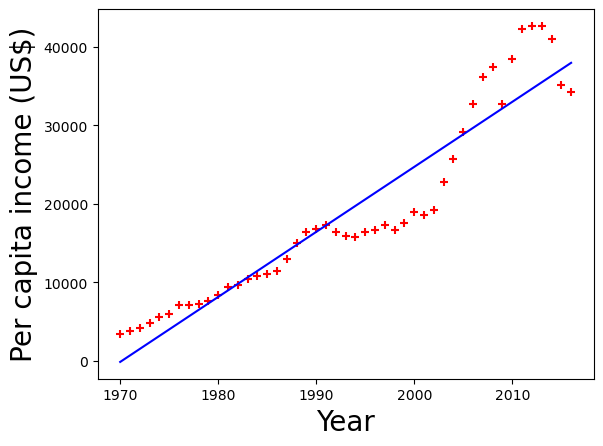

In [10]:
%matplotlib inline
# The first line, %matplotlib inline, is a magic command specific to Jupyter notebooks. 
# It ensures that any plots generated by Matplotlib are displayed directly in the notebook itself, 
# rather than in a separate window. This is especially useful for interactive data analysis, 
# as it keeps the plots within the context of the notebook cells.

plt.xlabel('Year', fontsize=20)
plt.ylabel('Per capita income (US$)', fontsize=20)
plt.scatter(df['year'], df['per capita income (US$)'], color='red', marker='+')

# Plots the linear regression line using predicted values based on the 'year' column.

In [11]:
reg = linear_model.LinearRegression()
reg.fit(df[['year']], df['per capita income (US$)'])

# If the column name were capita instead of per capita income (US$), 
# you could use dot notation (df.capita) to access the column, because capita is a valid Python identifier
# (i.e., it doesn't contain spaces or special characters and doesn't conflict with any existing attributes
# or methods of the DataFrame).


# Creates a Linear Regression Model: The LinearRegression instance is created and stored in the variable reg.
# Trains the Model: The fit method trains the model on the provided data (year as the input feature and 
# per capita income (US$) as the target).
# During the training phase (fit method), the linear regression algorithm determines the best-fit line 
# that minimizes the error (difference) between the actual data points and the predicted values.
# It calculates the coefficients (slope and intercept) of the linear equation: 
# y=mx+b, where m is the slope and b is the intercept.

LinearRegression()

In [1]:
%matplotlib inline
# The first line, %matplotlib inline, is a magic command specific to Jupyter notebooks. 
# It ensures that any plots generated by Matplotlib are displayed directly in the notebook itself, 
# rather than in a separate window. This is especially useful for interactive data analysis, 
# as it keeps the plots within the context of the notebook cells.

plt.xlabel('Year', fontsize=20)
plt.ylabel('Per capita income (US$)', fontsize=20)
plt.scatter(df['year'], df['per capita income (US$)'], color='red', marker='+')

plt.plot(df['year'], reg.predict(df[['year']]), color='blue')
# Plots the linear regression line using predicted values based on the 'year' column.

NameError: name 'plt' is not defined

In [12]:
predicted_income = reg.predict([[2020]])
print(f"Predicted per capita income for the year 2020: {predicted_income[0]}")

Predicted per capita income for the year 2020: 41288.69409441762


C:\Users\PIYUSH_M\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [13]:
# alternative to not get the warning
predicted_income = reg.predict(pd.DataFrame([[2020]], columns=['year']))
print(f"Predicted per capita income for the year 2020: {predicted_income[0]}")

Predicted per capita income for the year 2020: 41288.69409441762


In [14]:
reg.coef_
# m(slope)

array([828.46507522])

In [15]:
reg.intercept_
# b(intercept)

-1632210.7578554575

In [16]:
# in the formula y = mx + b, we have m and b calculated by model, then we gave value for x, to calculate y

In [17]:
# Create a DataFrame with the years for prediction
years_to_predict = pd.DataFrame({
    'year': [2020, 2025, 2030, 2035, 2040]
})

# Save the DataFrame to a CSV file
years_to_predict.to_csv('years_to_predict.csv', index=False)

In [18]:
d = pd.read_csv('years_to_predict.csv')
d.head()

,year
0,2020
1,2025
2,2030
3,2035
4,2040


In [19]:
p = reg.predict(d)

In [20]:
d['per capita income'] = p

In [21]:
d

,year,per capita income
0,2020,41288.694094
1,2025,45431.019471
2,2030,49573.344847
3,2035,53715.670223
4,2040,57857.995599


In [22]:
d.to_csv('per_capita_income_predictions.csv', index = False)

# Saving model

In [23]:
import pickle

In [25]:
with open('model_pickle', 'wb') as f:
    pickle.dump(reg, f)
    
# reg is the model, reg = LinearRegression()

In [26]:
# using pre-trained model

with open('model_pickle', 'rb') as f:
    mp = pickle.load(f)        

In [28]:
# alternative to not get the warning
predicted_income = mp.predict(pd.DataFrame([[2020]], columns=['year']))
print(f"Predicted per capita income for the year 2020: {predicted_income[0]}")

Predicted per capita income for the year 2020: 41288.69409441762


# Alternative

In [31]:
# using joblib

import joblib

In [32]:
joblib.dump(reg, 'model_joblib')

['model_joblib']

In [33]:
mj = joblib.load('model_joblib')

In [35]:
mj.predict(pd.DataFrame([[2020]], columns=['year']))

array([41288.69409442])